In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [33]:
data=load_iris()

In [34]:
X, y = data.data, data.target

In [35]:
import pandas as pd
data = pd.DataFrame(data.data, columns=data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    verbose=True
)

In [44]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.15019394
Iteration 2, loss = 1.14668742
Iteration 3, loss = 1.14319015
Iteration 4, loss = 1.13969902
Iteration 5, loss = 1.13623044
Iteration 6, loss = 1.13280785
Iteration 7, loss = 1.12940088
Iteration 8, loss = 1.12596082
Iteration 9, loss = 1.12252247
Iteration 10, loss = 1.11906735
Iteration 11, loss = 1.11565730
Iteration 12, loss = 1.11226125
Iteration 13, loss = 1.10891265
Iteration 14, loss = 1.10559647
Iteration 15, loss = 1.10230858
Iteration 16, loss = 1.09906473
Iteration 17, loss = 1.09587387
Iteration 18, loss = 1.09271673
Iteration 19, loss = 1.08960505
Iteration 20, loss = 1.08653297
Iteration 21, loss = 1.08347584
Iteration 22, loss = 1.08046347
Iteration 23, loss = 1.07749175
Iteration 24, loss = 1.07455636
Iteration 25, loss = 1.07164441
Iteration 26, loss = 1.06877139
Iteration 27, loss = 1.06594561
Iteration 28, loss = 1.06322146
Iteration 29, loss = 1.06054199
Iteration 30, loss = 1.05791386
Iteration 31, loss = 1.05536438
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42,
              verbose=True)

In [45]:
y_pred = mlp.predict(X_test)

In [46]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


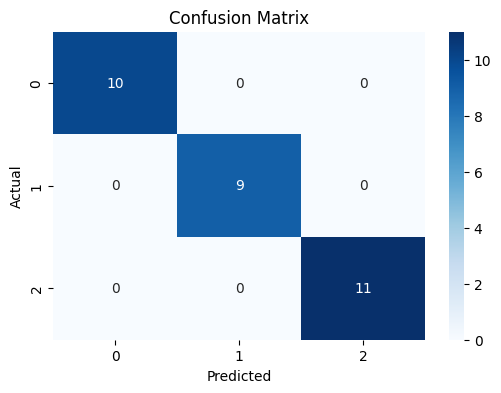

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get unique class labels
class_labels = list(set(y_test))
# Create a heatmap with proper labels
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
# Add titles and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
